<a id='home'></a>
### purpose

create code for figs of glevel vs plevel nested in marker_set - 2 trait sims only

### conclusions

1. glevel vs plevel
    individual methods
    - RONA temp and sal performed similarly across 2-trait sims, though sal did slightly better
    - lfmm2 
        - showed similar performance across categories
        - had fewer positive validation scores for highly polygenic architectures
    - GF - TODO once all sims finish
    - RDA
        - when correcting for structure, performance of true outlier markers decrease while non-true outliers increase (relative to no correction) - and neutral markers perform best
            - fewer positive validation scores for oligogenic sims (compared to no correction)
        - when not correcting for structure true outliers perform better than other marker sets, though the difference in performance is less so for highly polygenic architectures
            - oligogenic sims had more positive values than other architectures

    comparing methods
    - RDA and GF generally had negative validation scores, while the other methods had some gardens with positive relationships between offset and fitness
    
1. glevel vs slevel (TODO)

1. glevel vs popsize (TODO)

1. glevel vs migration (TODO)

In [1]:
from pythonimports import *

import MVP_summary_functions as mvp

import seaborn as sns
from functools import partial

summarydir = '/work/lotterhos/MVP-Offsets/run_20220919/summaries'
figdir = makedir(op.join(summarydir, 'figs/01_glevel_vs_other'))
pkldir = makedir(op.join(summarydir, 'all_performance_dicts'))

t1 = dt.now()  # notebook timer

mvp.latest_commit()
session_info.show()

#########################################################
Today:	February 09, 2023 - 10:32:54
python version: 3.8.5

Current commit of pythonimports:
commit b5f64910f19a2f05c80319052d8d8ce5edc6765a  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Mon Jan 30 10:30:11 2023 -0500

Current commit of MVP_offsets:
commit caa0fefccc33fb9bba80c1589c9992c24b1ca836  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Thu Feb 9 10:32:41 2023 -0500
#########################################################



In [2]:
# get validation scores across gardens across reps
all_scores = mvp.combine_level_dicts(use_bcs_data=False)

reading reps (use_bcs_data = False): 100%|███████████████| 5/5 [00:06<00:00,  1.31s/it]


0-225
	 RONA num seeds =  224
	 lfmm2 num seeds =  224
	 GF num seeds =  224
	 rda num seeds =  224


225-450
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


450-675
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


675-900
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225


900-1125
	 RONA num seeds =  225
	 lfmm2 num seeds =  225
	 GF num seeds =  225
	 rda num seeds =  225



 RONA df.shape = (674400, 15) num_seeds = 1124 num_reps = 5

 lfmm2 df.shape = (404400, 16) num_seeds = 1124 num_reps = 5

 GF df.shape = (337200, 15) num_seeds = 1124 num_reps = 5

 rda df.shape = (1078400, 17) num_seeds = 1124 num_reps = 5


In [3]:
programs = keys(all_scores)

programs

['RONA', 'lfmm2', 'GF', 'rda']

In [4]:
all_scores['GF'].head()

,garden,score,glevel,plevel,pleio,slevel,landscape,popsize,migration,marker_set,seed,simulation_level,noncausal_env,offset_level,rep,simulation_garden,final_LA,cor_TPR_temp,cor_TPR_sal
1231095,1,-0.903434,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,2,-0.905051,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,3,-0.909899,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,4,-0.914747,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN
1231095,5,-0.911515,highly-polygenic,1-trait,no pleiotropy,NaN,Est-Clines,N-cline-N-to-S,m-constant,adaptive,1231095,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,one noncausal,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0-225,highly-polygenic_1-trait_no-pleiotropy_nan_Est...,0.505075,0.531414,NaN


# functions for creating figs

In [5]:
def generic_glevel_fig(program, data, hue=None, hue_order=None, add_title='', filename=None):
    """Explore effect on validation scores for *hue* nested within marker_set nested within architecture."""
    print(program)
    
    # so RDA outliers label looks nice
    data['marker_set'] = data['marker_set'].str.replace(' ', '\n')
    
    # create fig
    g = sns.catplot(data=data,
                    x='marker_set',
                    y='score',
                    order=sorted(data['marker_set'].unique()),  # x order
                    col='glevel',
                    col_order=mvp.hue_order['glevel'], # ['oligogenic', 'mod-polygenic', 'highly-polygenic'],
                    kind='box',
                    hue=hue,
                    hue_order=hue_order,
                    height=4,
                    aspect=0.75,
                    margin_titles=False,
                    legend=True,
                    **mvp.boxplot_kwargs)
    
    g.set(ylim=(0.65, -1),
          yticks=mvp.ytick_labels,
          yticklabels=mvp.ytick_labels)
    
    mvp.pretty_facetgrid(g,
                         program,
                         num_levels=luni(data.simulation_level),
                         num_reps=luni(data.rep),
                         add_title=add_title,
                         saveloc=op.join(figdir,
                                         filename if filename is not None else f'summary_{program}.pdf'))
    
    pass

# glevel vs plevel

pleiotropy nested in marker set nested in architecture (2-trait sims only)

In [6]:
# pleiotropy nested in marker_set nested in glevel
glevel_plevel_fig = partial(generic_glevel_fig,
                            hue='pleio',
                            hue_order=mvp.hue_order['pleio'])

glevel_plevel_fig 


RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_RONA_garden_performance_2-trait_temp_only.pdf


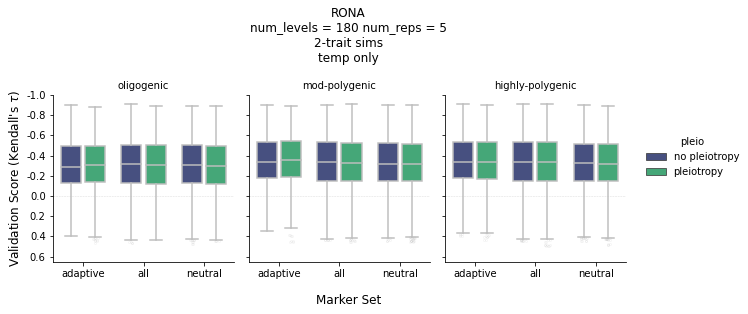

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_RONA_garden_performance_2-trait_sal_only.pdf


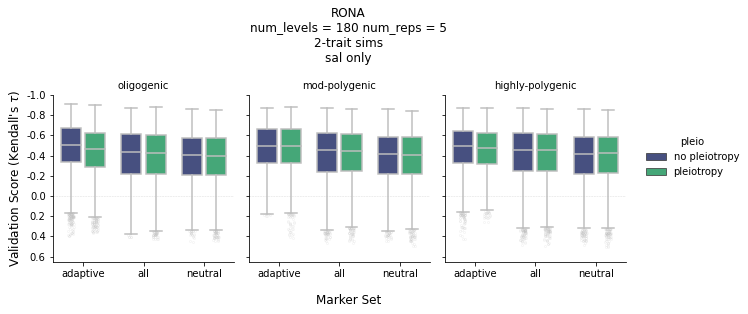

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_RONA_garden_performance_2-trait_both_envs.pdf


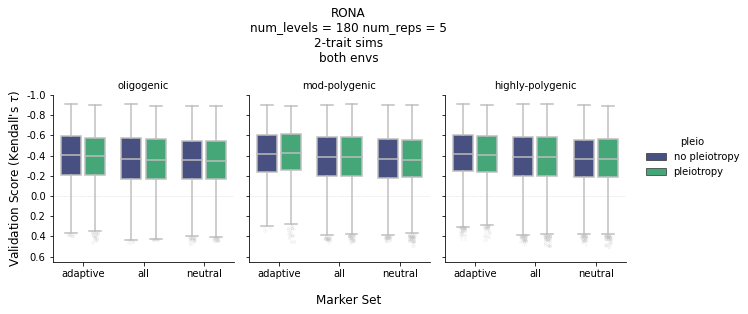

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_lfmm2_garden_performance_2-trait.pdf


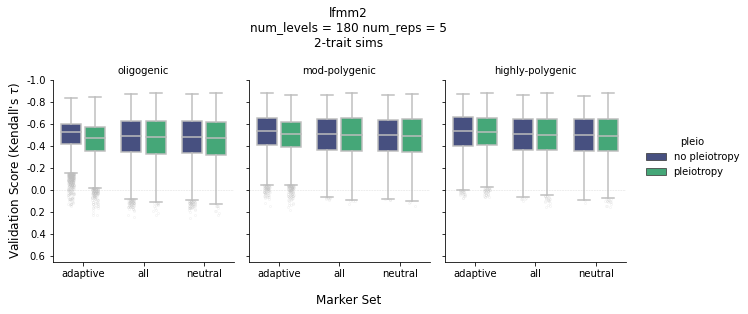

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_GF_garden_performance_2-trait.pdf


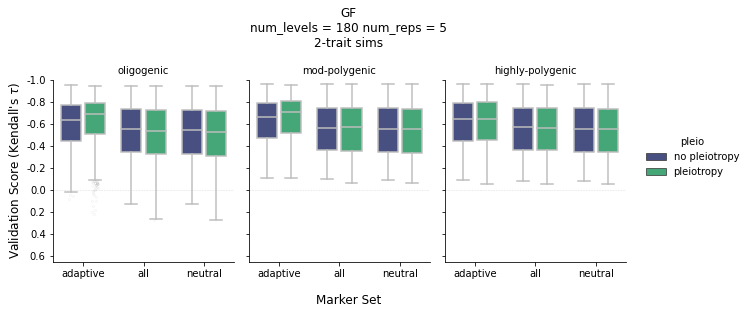

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


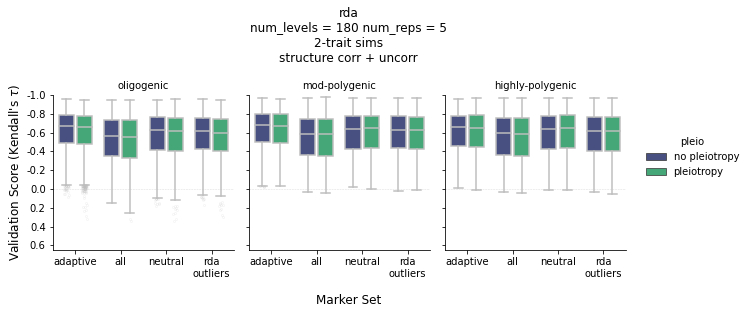

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_rda_garden_performance_2-trait_nocorr.pdf


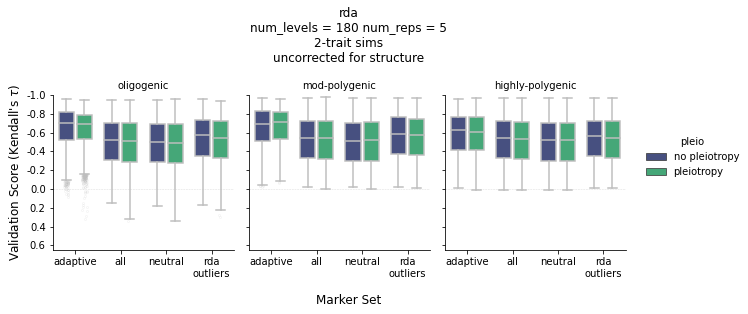

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_plevel_fig_rda_garden_performance_2-trait_structcorr.pdf


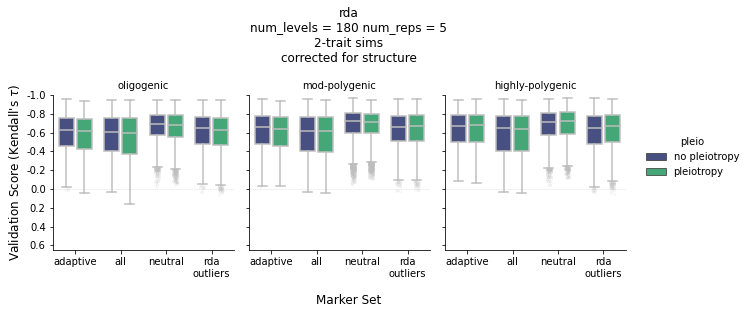

In [7]:
mvp.run_facetgrid_figs(glevel_plevel_fig, 'glevel_plevel_fig', all_scores)

# glevel vs slevel

selection nested in marker set nested in architecture (2-trait sims only)

In [8]:
# selection nested in marker_set nested in glevel
glevel_slevel_fig = partial(generic_glevel_fig,
                            hue='slevel',
                            hue_order=mvp.hue_order['slevel'])  # ['equal-S', 'unequal-S'])

glevel_slevel_fig 


RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_RONA_garden_performance_2-trait_temp_only.pdf


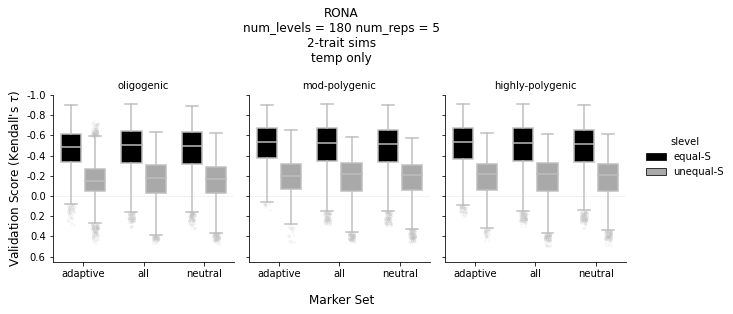

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_RONA_garden_performance_2-trait_sal_only.pdf


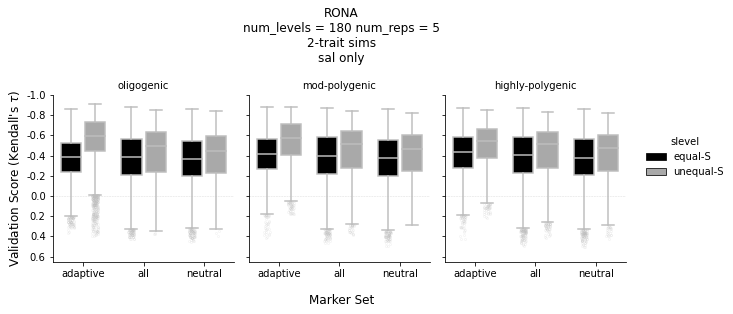

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_RONA_garden_performance_2-trait_both_envs.pdf


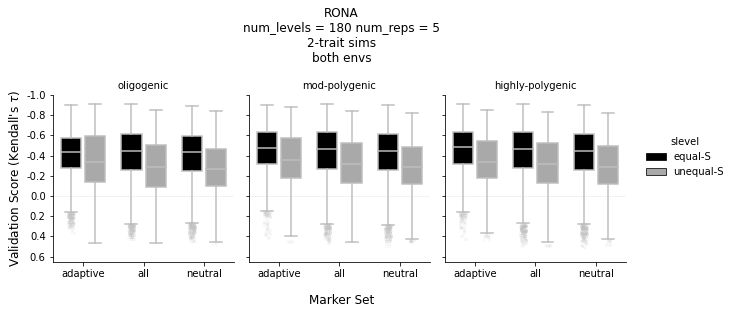

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_lfmm2_garden_performance_2-trait.pdf


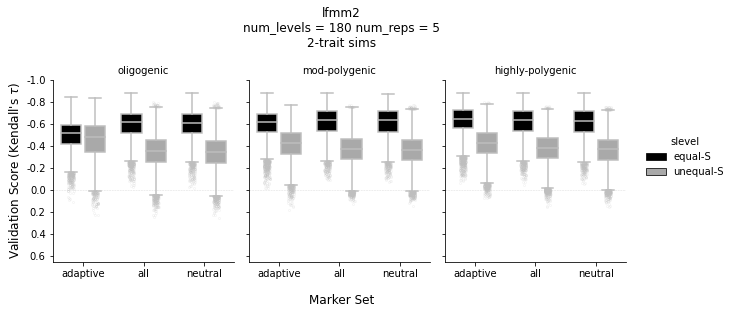

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_GF_garden_performance_2-trait.pdf


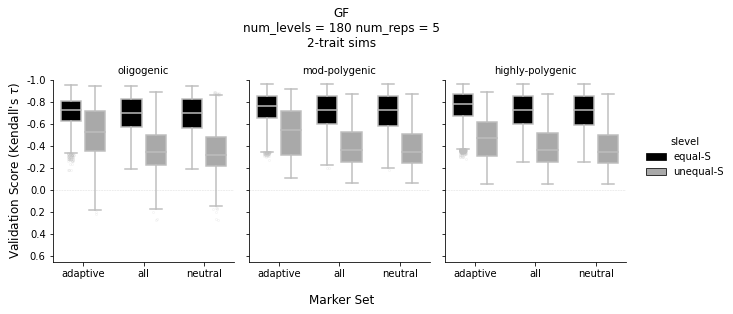

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


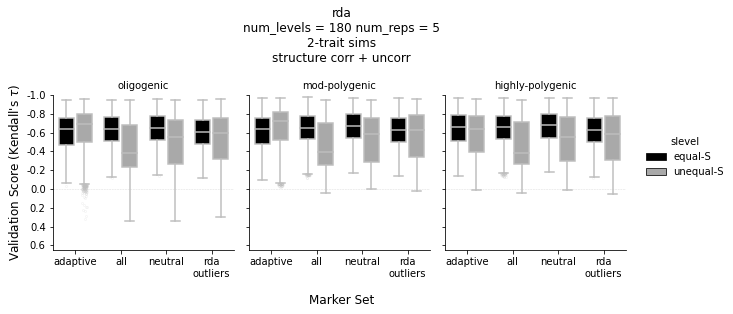

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_rda_garden_performance_2-trait_nocorr.pdf


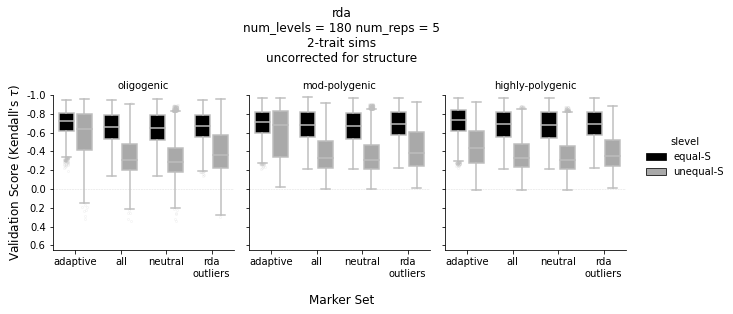

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_slevel_fig_rda_garden_performance_2-trait_structcorr.pdf


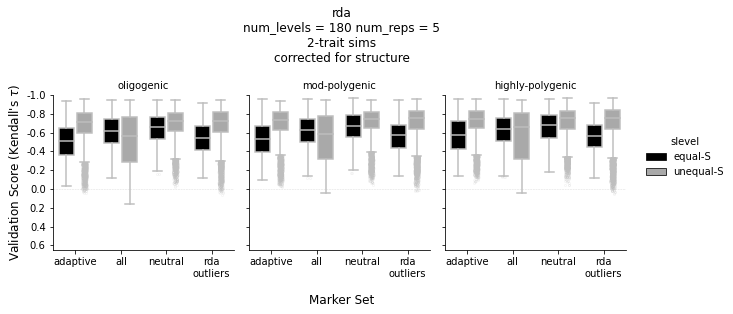

In [9]:
mvp.run_facetgrid_figs(glevel_slevel_fig, 'glevel_slevel_fig', all_scores)

# glevel vs popsize
popsize nested in marker set nested in architecture (2-trait sims only)

In [10]:
# popsize nested in marker_set nested in glevel
glevel_popsize_fig = partial(generic_glevel_fig,
                             hue='popsize',
                             hue_order=mvp.hue_order['popsize'])  # ['N-equal', 'N-variable', 'N-cline-center-to-edge', 'N-cline-N-to-S'])

glevel_popsize_fig 


RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_2-trait_temp_only.pdf


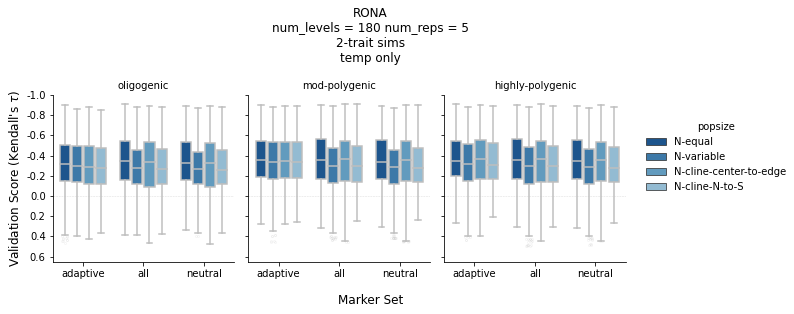

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_2-trait_sal_only.pdf


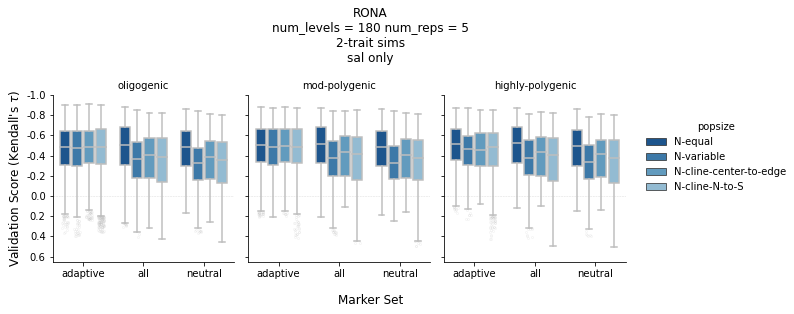

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_RONA_garden_performance_2-trait_both_envs.pdf


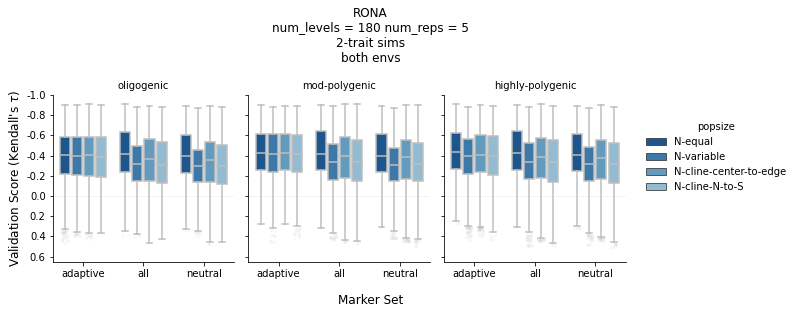

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_lfmm2_garden_performance_2-trait.pdf


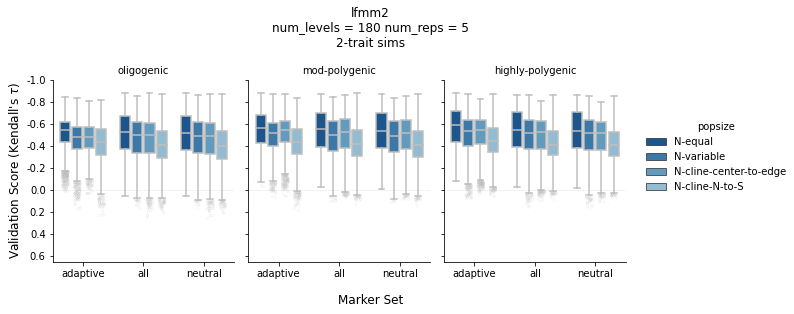

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_GF_garden_performance_2-trait.pdf


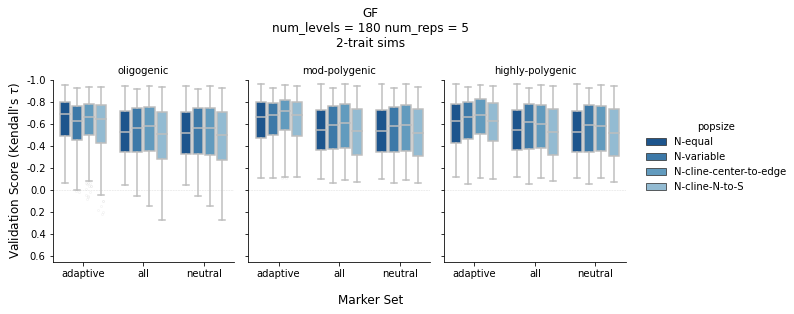

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


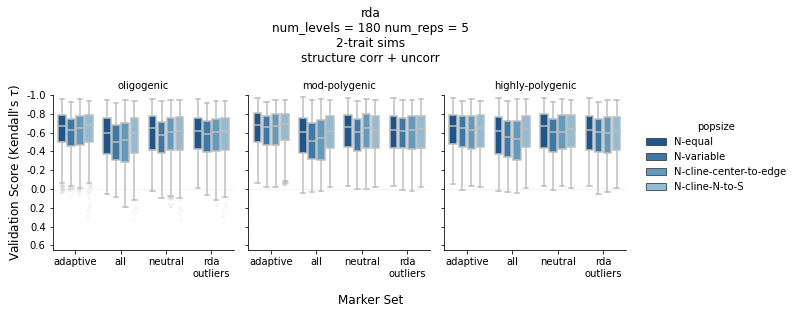

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_2-trait_nocorr.pdf


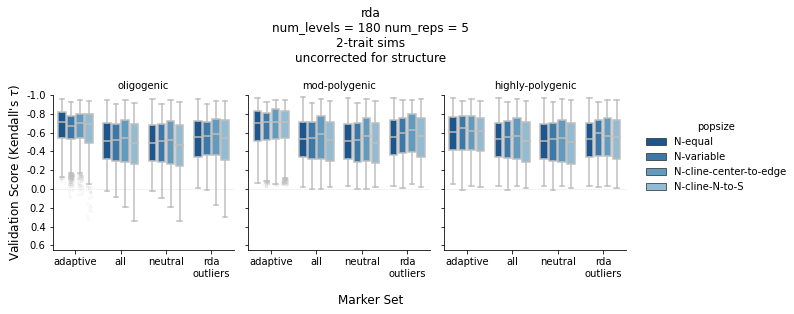

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_popsize_fig_rda_garden_performance_2-trait_structcorr.pdf


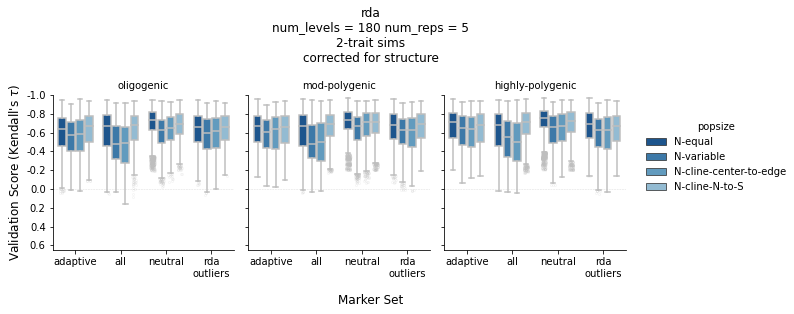

In [11]:
mvp.run_facetgrid_figs(glevel_popsize_fig, 'glevel_popsize_fig', all_scores)

# glevel vs migration
migration nested in marker set nested in architecture (2-trait sims only)

In [12]:
# migration nested in marker_set nested in glevel
glevel_migration_fig = partial(generic_glevel_fig,
                               hue='migration',
                               hue_order=mvp.hue_order['migration'])  # ['m-constant', 'm-variable', 'm-breaks'])

glevel_migration_fig 


RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_2-trait_temp_only.pdf


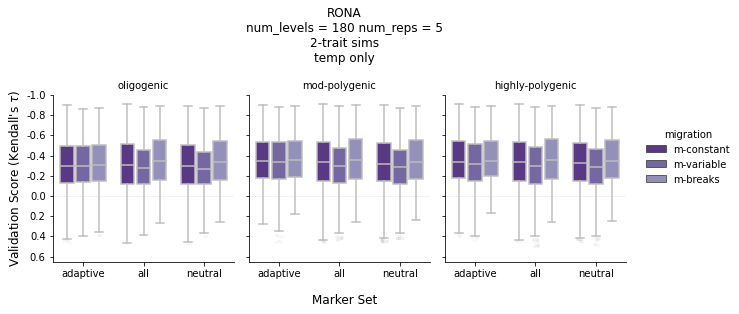

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_2-trait_sal_only.pdf


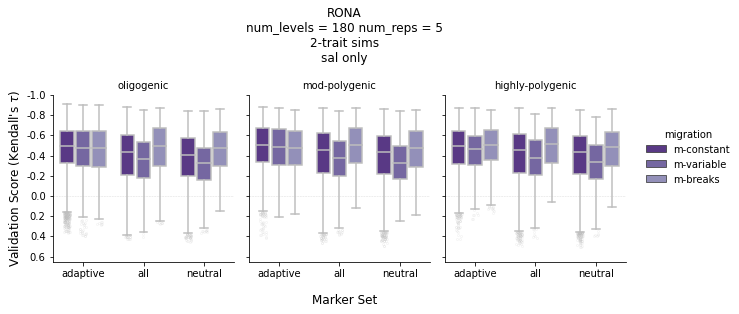

RONA
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_RONA_garden_performance_2-trait_both_envs.pdf


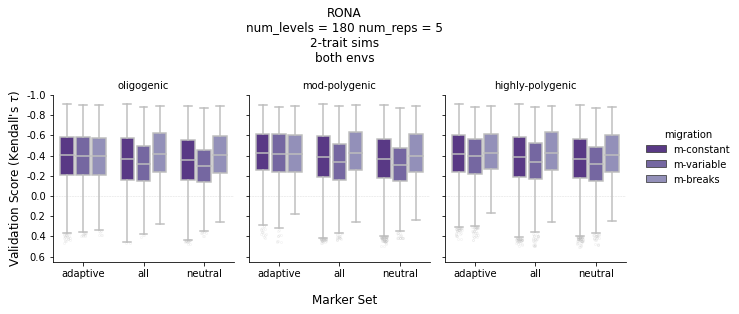

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_lfmm2_garden_performance_2-trait.pdf


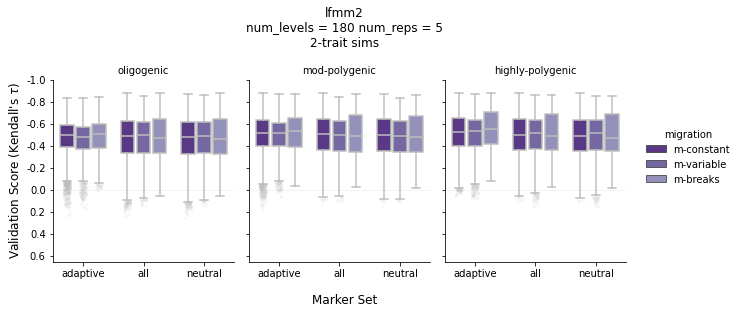

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_GF_garden_performance_2-trait.pdf


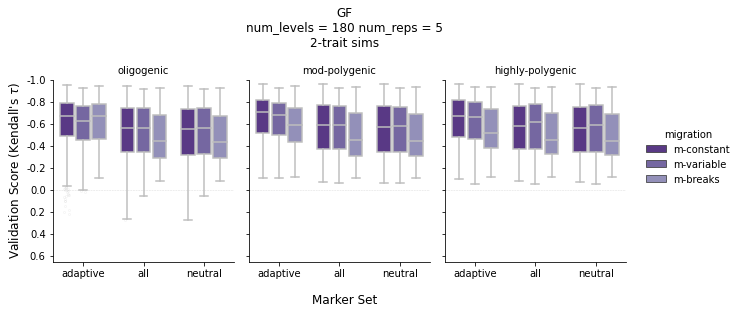

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_2-trait_structure_corr_+_uncorr.pdf


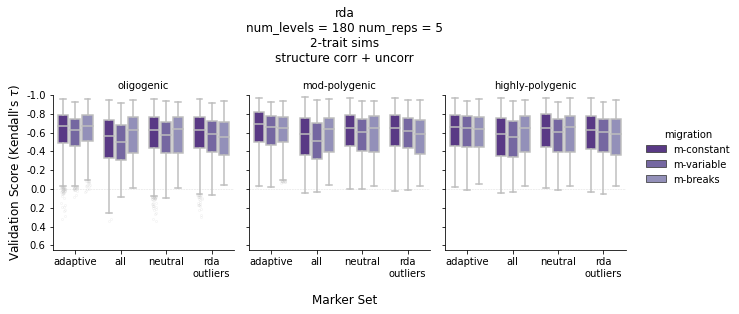

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_2-trait_nocorr.pdf


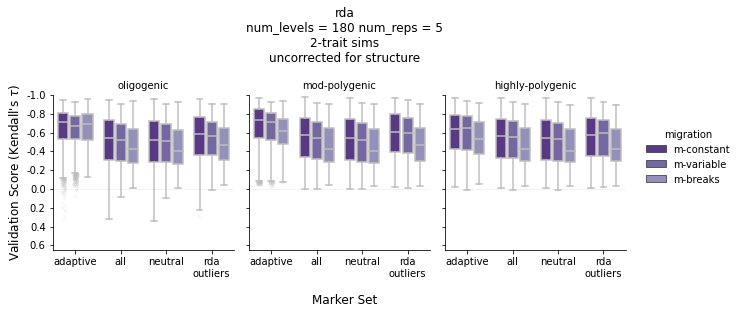

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_migration_fig_rda_garden_performance_2-trait_structcorr.pdf


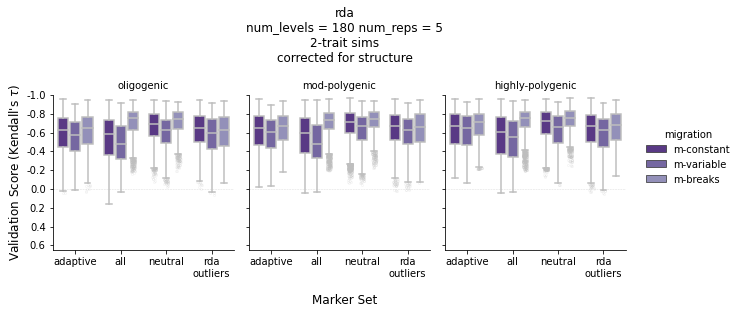

In [13]:
mvp.run_facetgrid_figs(glevel_migration_fig, 'glevel_migration_fig', all_scores)

# glevel vs adding non-causal envs to offset training

- sims with 

    1) one selective env but two were used to train offset ('one noncausal'), or 
    
    2) 2-traits and both envs used for offset ('all causal'), or 
    
    3) one selective env and one env used for offset ('no noncausal')

In [14]:
# what happens when non-causal envs are included in offset calculations?
glevel_noncausal_fig = partial(generic_glevel_fig,
                               hue='noncausal_env',
                               hue_order=mvp.hue_order['noncausal_env'])  # ['all causal', 'one noncausal', 'no noncausal'])

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_rda_garden_performance_1-or-2-trait_structure corr_+_uncorr.pdf


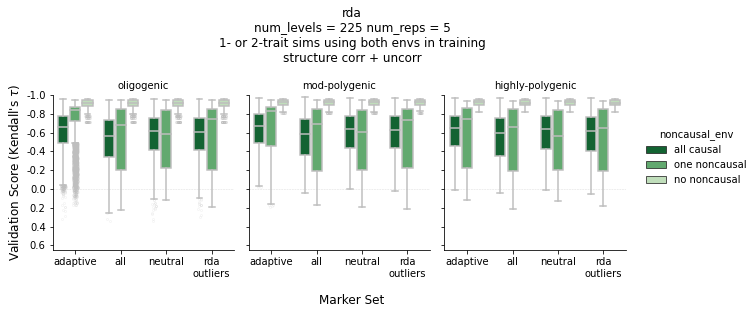

lfmm2
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_lfmm2_garden_performance_1-or-2-trait.pdf


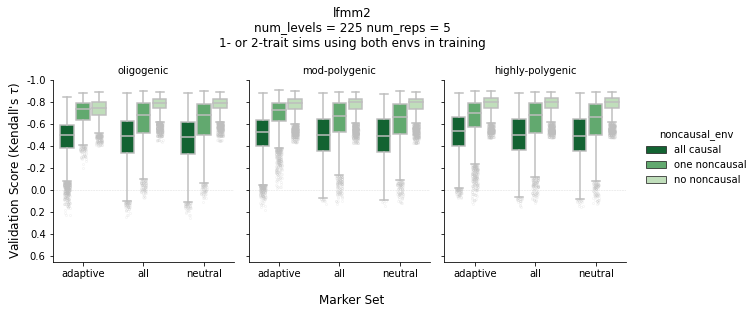

In [15]:
# rda structure-corrected + uncorrected
# lfmm
for program in ['rda', 'lfmm2']:    
    data = all_scores[program].copy()
    
    add_title = '\n1- or 2-trait sims using both envs in training'
    if program == 'rda':
        add_title += '\nstructure corr + uncorr'
        add = '_structure corr_+_uncorr'
    else:
        add = ''
    
    glevel_noncausal_fig(
        program, data, add_title=add_title,
        filename=f'glevel_noncausal_fig_{program}_garden_performance_1-or-2-trait{add}.pdf'
    )
    

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_rda_garden_performance_1-or-2-trait_nocorr.pdf


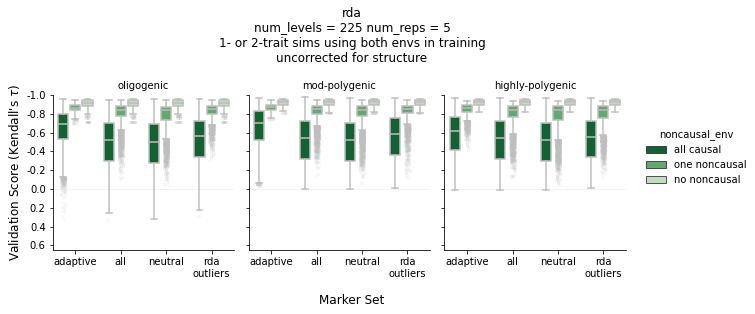

rda
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_rda_garden_performance_1-or-2-trait_structcorr.pdf


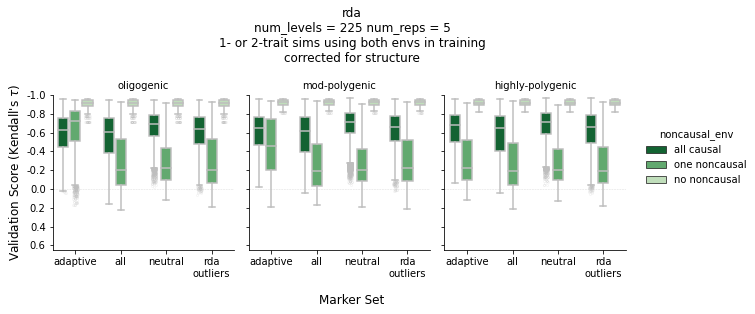

In [16]:
# compare RDA structure-corrected vs structure uncorrected (two figs)
for structcrxn in ['nocorr', 'structcorr']:
    data = all_scores['rda'].copy()
    
    # filter for structure correction (or not)
    data = data[data['structcrxn'] == structcrxn]
    
    add_title = '\n1- or 2-trait sims using both envs in training'
    add_title += '\nuncorrected for structure' if structcrxn == 'nocorr' else '\ncorrected for structure'
    
    glevel_noncausal_fig(
        'rda', data, add_title=add_title,
        filename=f'glevel_noncausal_fig_rda_garden_performance_1-or-2-trait_{structcrxn}.pdf'
    )

GF
Saved to:  /work/lotterhos/MVP-Offsets/run_20220919/summaries/figs/01_glevel_vs_other/glevel_noncausal_fig_GF_garden_performance_1-or-2-trait.pdf


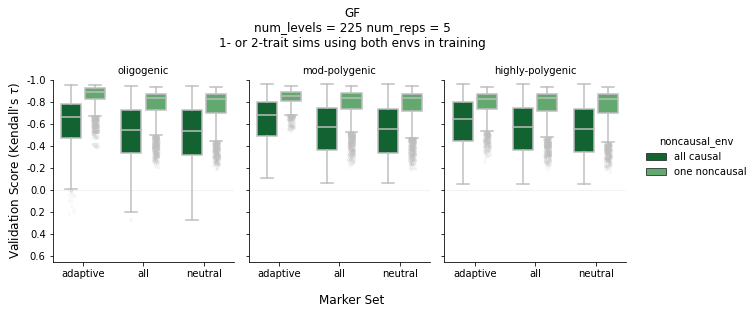

In [17]:
# gradient forests
data = all_scores['GF'].copy()

# data['noncausal_env'] = data.plevel.map({'1-trait' : 'one noncausal', '2-trait' : 'all causal'})

add_title = '\n1- or 2-trait sims using both envs in training'

glevel_noncausal_fig(
    'GF', data, add_title=add_title, hue_order=['all causal', 'one noncausal'],
    filename=f'glevel_noncausal_fig_GF_garden_performance_1-or-2-trait.pdf'
)

In [18]:
formatclock(dt.now() - t1, exact=True)

'0-00:01:30'